<div>
    <table>
    <tr>
        <th style="text-align: center;">Project</th>
        <td style="text-align: center; width: 200px">CO2 Emissions</td>
        <td colspan="3" rowspan="3" style="text-align: center; width: 200px"><h1>Second Step - Pre-processing and Feature Engineering</h1></td>
    </tr>
    <tr>
        <th style="text-align: center;">Location</th>
        <td style="text-align: center; width: 200px">-</td>
    </tr>
    <tr>
        <th style="text-align: center;">Date</th>
        <td style="text-align: center; width: 200px">21/03/2024</td>
    </tr>
    <tr>
        <th style="text-align: center;">&nbsp;</th>
        <td style="text-align: center; width: 200px">&nbsp;</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
    </tr>
    <tr>
        <th style="text-align: center;">COHORD:</th>
        <td style="text-align: center; width: 200px">C. ARNAUD</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
        <td style="text-align: center; width: 200px">&nbsp;</td>
    </tr>
    <tr>
        <th style="text-align: center;">&nbsp;</th>
        <td style="text-align: center;">D. GOMEZ-OCHOA</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
    </tr>
    <tr>
        <th style="text-align: center;">&nbsp;</th>
        <td style="text-align: center;">P. DESHPANDE</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
    </tr>
    <tr>
        <th style="text-align: center;">&nbsp;</th>
        <td style="text-align: center;">R. MARINHO</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
    </tr>
    <tr>
        <th style="text-align: center;">&nbsp;</th>
        <td style="text-align: center;">S. MASOOD</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
        <td style="text-align: center;">&nbsp;</td>
    </tr>
    </table>
</div>

# Purpose

> The purpose of this report is to prepare the data that was discovered in last phase to be used on the modelling phase.
>
> The main objectives are:
>
> - Perform the required pre-processing.
> - Perform feature engineering.
> - End up with the final data set for start modeling
> 
> 

# 1. IMPORTS

In [1]:
import re
import sys
import os

from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent))
from co2emissions.config import data_dir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

import warnings 
warnings.filterwarnings('ignore') # Ignore undesired warnigs
import plotly.express as px

plt.rcParams['figure.dpi'] = 120 # Better image quality in matplotlib plots

# 2-INITIAL DATA SET

In [2]:
df_path = os.path.join(data_dir,'0-raw', 'FRANCE', 'data_2012_1015.csv')
df = pd.read_csv(df_path)
df.head(3)

lib_mrq_utac lib_mod_doss lib_mod                      dscom           tvv  \
0   ALFA ROMEO          159     159      159 1750 Tbi (200ch)   939AXN1B52C    
1   ALFA ROMEO          159     159  159 2.0 JTDm (170ch) ECO   939AXP1B54C    
2   ALFA ROMEO          159     159      159 2.0 JTDm (136ch)    939AXR1B64    

  cod_cbr hybride  puiss_admin_98  puiss_max typ_boite_nb_rapp  ...    nox  \
0      ES     non            12.0      147.0               M 6  ...  0.032   
1      GO     non             9.0      125.0               M 6  ...  0.169   
2      GO     non             7.0      100.0               M 6  ...  0.149   

   hcnox   ptcl  masse_ordma_min  masse_ordma_max                 champ_v9  \
0    NaN  0.002           1505.0           1505.0  715/2007*692/2008EURO5    
1  0.190  0.003           1565.0           1565.0  715/2007*692/2008EURO5    
2  0.175  0.001           1565.0           1565.0  715/2007*692/2008EURO5    

   date_maj  year  Carrosserie  gamme  
0   juin-14  2015          NaN    NaN  
1   juin-14  2015          NaN    NaN  
2   juin-14  2015          NaN    NaN  

[3 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159780 entries, 0 to 159779
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   lib_mrq_utac       159780 non-null  object 
 1   lib_mod_doss       159780 non-null  object 
 2   lib_mod            159780 non-null  object 
 3   dscom              159780 non-null  object 
 4   tvv                159780 non-null  object 
 5   cod_cbr            159780 non-null  object 
 6   hybride            159780 non-null  object 
 7   puiss_admin_98     159780 non-null  float64
 8   puiss_max          159724 non-null  float64
 9   typ_boite_nb_rapp  159780 non-null  object 
 10  conso_urb          159543 non-null  float64
 11  conso_exurb        159543 non-null  float64
 12  conso_mixte        159622 non-null  float64
 13  co2                159622 non-null  float64
 14  co_typ_1           159090 non-null  float64
 15  hc                 36813 non-null   float64
 16  no

# 3. PRE-PRECESSING

## Action List

> The following pre-processing steps where identified in last phase of this project (refer to CN1-DATA MINING+DATAVIZ):
> - Identify the number of car brands using each fuel type and compare the proportions to get a bigger picture for why CO2 emissions differ between each brand.
> - Replace fuel type by the correct values. To do this, it’s possible to check the fuel type of a car of another year of the French Government dataset by using the variable ‘tvv’ (if the ‘tvv’ variable is similar, it means that this is the same car with the same characteristics).
> - Some cars have the same min and max mass order (around 47 000 cars) while it is different for the others. If the variable max mass is kept during the next phase, this problematic must be investigated.
> - After corrections, check for duplicated values without considering columns like: `date_maj`, `champ_v9`, etc. That can be different for the same car with same characteristics. Also, variables that has a lot of missing values like: `hcnox`, `ptcl`, `hc`, etc. must be removed from the comparison list.

## `tvv` trailing space

In [4]:
df.tvv.head(3).tolist()

['939AXN1B52C ', '939AXP1B54C ', '939AXR1B64 ']

> We notice that the `tvv` variable have some extra space, we need to remove it.

In [5]:
df.tvv = df.tvv.str.strip()

## Fuel Type Correction

### `GO` Hybrid cars

In [6]:
df[['cod_cbr', 'hybride']][(df.hybride == 'oui')].value_counts()

cod_cbr  hybride
EH       oui        1043
GH       oui         521
ES       oui         105
EE       oui         104
GO       oui          27
GL       oui           3
Name: count, dtype: int64

> Lets check for other GO hybrid cars in the data set:

In [7]:
tvv_list = df[(df.hybride == 'oui') & (df.cod_cbr == 'GO')]['tvv']

cod_cbr_list = []
for index in range(len(tvv_list)):
    cod_cbr_list.append([tvv_list.values[index],df[df.tvv == tvv_list.values[index]]['cod_cbr'].to_list()])

cod_cbr_list

[['KFRHC8/1P', ['GH', 'GH', 'GH', 'GO']],
 ['212J00UM0NZAAA400', ['GH', 'GO']],
 ['212J00UM0NZAAA401', ['GH', 'GO']],
 ['212J00UM0NZAAA402', ['GH', 'GO']],
 ['212J00UM0NZAAA442', ['GH', 'GO']],
 ['212J00UM0NZAAA500', ['GH', 'GO']],
 ['212J00UM0NZAAA501', ['GH', 'GO']],
 ['212J00UM0NZAAA502', ['GH', 'GO']],
 ['212J00UM0NZAAA542', ['GH', 'GO']],
 ['212J00UM0NZAAB400', ['GH', 'GO']],
 ['212J00UM0NZAAB401', ['GH', 'GO']],
 ['212J00UM0NZAAB402', ['GH', 'GO']],
 ['212J00UM0NZAAB442', ['GH', 'GO']],
 ['212J00UM0NZAAB500', ['GH', 'GO']],
 ['212J00UM0NZAAB501', ['GH', 'GO']],
 ['212J00UM0NZAAB502', ['GH', 'GO']],
 ['212J00UM0NZAAB542', ['GH', 'GO']],
 ['212KJ20UM0NZAAA500', ['GH', 'GO']],
 ['212KJ20UM0NZAAA501', ['GH', 'GO']],
 ['212KJ20UM0NZAAA502', ['GH', 'GO']],
 ['212KJ20UM0NZAAA542', ['GH', 'GO']],
 ['212KJ20UM0NZAAB500', ['GH', 'GO']],
 ['212KJ20UM0NZAAB501', ['GH', 'GO']],
 ['212KJ20UM0NZAAB502', ['GH', 'GO']],
 ['212KJ20UM0NZAAB542', ['GH', 'GO']],
 ['8URHC8/P', ['GH', 'GH', 'GH', 'GO']

> We see that most of the cars has a version with a GH that is more logical.
>
> We will erplace all GO hybrids by GH!

In [8]:
df.loc[(df.hybride == 'oui') & (df.cod_cbr == 'GO'), 'cod_cbr'] = 'GH'

In [9]:
# Lets recheck:
df[['cod_cbr', 'hybride']][(df.hybride == 'oui')].value_counts()

cod_cbr  hybride
EH       oui        1043
GH       oui         548
ES       oui         105
EE       oui         104
GL       oui           3
Name: count, dtype: int64

### `ES` Hybrid cars

> Lets check for other ES hybrid cars in the data set:

In [10]:
tvv_list = df[(df.hybride == 'oui') & (df.cod_cbr == 'ES')]['tvv']

cod_cbr_list = []
for index in range(len(tvv_list)):
    cod_cbr_list.append([tvv_list.values[index],df[df.tvv == tvv_list.values[index]]['cod_cbr'].to_list()])

display(cod_cbr_list)
display(len(cod_cbr_list))

[['8R2XCHJAQ1QA8BW001R8R7A7MG', ['ES']],
 ['4G2LCHJAF1FA8BW003R4G71', ['ES']],
 ['4H2LCHJAF1FA8BW001R4H82S57MGEM0', ['ES']],
 ['HYKX815A000', ['EH', 'ES']],
 ['HYFZ915A100', ['EH', 'ES']],
 ['HYFZ915A200', ['EH', 'ES']],
 ['HYFZ915A300', ['EH', 'ES']],
 ['HYKX615A000', ['EH', 'ES']],
 ['GP111', ['EH', 'EH', 'EH', 'ES']],
 ['ZF111', ['EH', 'ES']],
 ['ZF112', ['EH', 'ES']],
 ['ZE215', ['EH', 'EH', 'EH', 'ES']],
 ['ZE216', ['EH', 'EH', 'EH', 'ES']],
 ['XP13M(a)NHP13(MH)NHP130L-CHXGBW(3C)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXNBW(1P)', ['ES']],
 ['XP13M(a)NHP13(MH)NHP130L-CHXNBW(1C)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXNBW(2P)', ['ES']],
 ['XW3(a)ZVW30(H)ZVW30L-AHXEBW(1D)', ['ES']],
 ['XW3(a)ZVW30(H)ZVW30L-AHXEBW(2D)', ['ES']],
 ['XW4(a)ZVW40(W)ZVW40L-AWXEBW(1A)', ['ES']],
 ['XW4(a)ZVW40(W)ZVW40L-AWXEBW(2A)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXGBW(1P)', ['ES']],
 ['HAL1(a)GYL10(W)GYL10L-AWXGKW(1D)', ['EH', 'EH', 'EH', 'ES']],
 ['A10(a)ZWA10(H)ZWA10R-AHXEBW(1A)', ['EH', 'EH', 

105

> Most of the tvv have a corresponding EH car, lets take a closer look in the cars that hasve only ES fule type

In [11]:
cod_cbr_list = [item for item in cod_cbr_list if len(item[1]) == 1]
display(cod_cbr_list)
display(len(cod_cbr_list))

[['8R2XCHJAQ1QA8BW001R8R7A7MG', ['ES']],
 ['4G2LCHJAF1FA8BW003R4G71', ['ES']],
 ['4H2LCHJAF1FA8BW001R4H82S57MGEM0', ['ES']],
 ['XP13M(a)NHP13(MH)NHP130L-CHXGBW(3C)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXNBW(1P)', ['ES']],
 ['XP13M(a)NHP13(MH)NHP130L-CHXNBW(1C)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXNBW(2P)', ['ES']],
 ['XW3(a)ZVW30(H)ZVW30L-AHXEBW(1D)', ['ES']],
 ['XW3(a)ZVW30(H)ZVW30L-AHXEBW(2D)', ['ES']],
 ['XW4(a)ZVW40(W)ZVW40L-AWXEBW(1A)', ['ES']],
 ['XW4(a)ZVW40(W)ZVW40L-AWXEBW(2A)', ['ES']],
 ['HE15U(a)ZWE150(H)ZWE150L-DHXGBW(1P)', ['ES']],
 ['92AHFH2202', ['ES']],
 ['7PHACCGEAX1AA8AA8C8024VR47MGO', ['ES']]]

14

> Lets check in the EEA database what type of fuel we have for these cars:

In [12]:
UE_data_path = os.path.join(data_dir, '0-raw', 'EEA', 'UE_data_2012.csv')
UE_2012 = pd.read_csv(UE_data_path, sep='\t', index_col='id')
display(UE_2012.head(3))
UE_2013 = pd.read_csv(UE_data_path, sep='\t', index_col='id')
display(UE_2013.head(3))
UE_2014 = pd.read_csv(UE_data_path, sep='\t', index_col='id')
display(UE_2014.head(3))
UE_2015 = pd.read_csv(UE_data_path, sep='\t', index_col='id')
display(UE_2015.head(3))

UE = pd.concat([UE_2012, UE_2013, UE_2014, UE_2015])
UE.info()
# UE.to_csv('UE_2012_2015.csv', index=False)

# UE = pd.read_csv('UE_2012_2015.csv')
# UE.head(3)

MS      Mh     MAN     MMS         TAN       T   Va   Ve          Mk  \
id                                                                         
1   AT  AA-IVA  AA-IVA  ANDERE  11997/2012  CH6391  NaN  NaN     CHANGHE   
2   AT  AA-IVA  AA-IVA  ANDERE  14293/2012    RIOT  NaN  NaN       SYLVA   
3   AT  AA-IVA  AA-IVA  ANDERE  20346/2011     CEO  NaN  NaN  SHUANGHUAN   

                 Cn  ... at1 (mm)  at2 (mm)        Ft  Fm  ec (cm3)  ep (KW)  \
id                   ...                                                       
1   COOLCAR ELEKTRO  ...   1325.0    1305.0  Electric   M       NaN     20.0   
2        SYLVA RIOT  ...   1320.0    1375.0    Petrol   M    1340.0    145.0   
3             60849  ...   1535.0    1535.0    Petrol   M    2351.0     92.0   

    z (Wh/km)   IT Er (g/km)   MP  
id                                 
1         NaN  NaN       NaN  NaN  
2         NaN  NaN       NaN  NaN  
3         NaN  NaN       NaN  NaN  

[3 rows x 25 columns]

MS      Mh     MAN     MMS         TAN       T   Va   Ve          Mk  \
id                                                                         
1   AT  AA-IVA  AA-IVA  ANDERE  11997/2012  CH6391  NaN  NaN     CHANGHE   
2   AT  AA-IVA  AA-IVA  ANDERE  14293/2012    RIOT  NaN  NaN       SYLVA   
3   AT  AA-IVA  AA-IVA  ANDERE  20346/2011     CEO  NaN  NaN  SHUANGHUAN   

                 Cn  ... at1 (mm)  at2 (mm)        Ft  Fm  ec (cm3)  ep (KW)  \
id                   ...                                                       
1   COOLCAR ELEKTRO  ...   1325.0    1305.0  Electric   M       NaN     20.0   
2        SYLVA RIOT  ...   1320.0    1375.0    Petrol   M    1340.0    145.0   
3             60849  ...   1535.0    1535.0    Petrol   M    2351.0     92.0   

    z (Wh/km)   IT Er (g/km)   MP  
id                                 
1         NaN  NaN       NaN  NaN  
2         NaN  NaN       NaN  NaN  
3         NaN  NaN       NaN  NaN  

[3 rows x 25 columns]

MS      Mh     MAN     MMS         TAN       T   Va   Ve          Mk  \
id                                                                         
1   AT  AA-IVA  AA-IVA  ANDERE  11997/2012  CH6391  NaN  NaN     CHANGHE   
2   AT  AA-IVA  AA-IVA  ANDERE  14293/2012    RIOT  NaN  NaN       SYLVA   
3   AT  AA-IVA  AA-IVA  ANDERE  20346/2011     CEO  NaN  NaN  SHUANGHUAN   

                 Cn  ... at1 (mm)  at2 (mm)        Ft  Fm  ec (cm3)  ep (KW)  \
id                   ...                                                       
1   COOLCAR ELEKTRO  ...   1325.0    1305.0  Electric   M       NaN     20.0   
2        SYLVA RIOT  ...   1320.0    1375.0    Petrol   M    1340.0    145.0   
3             60849  ...   1535.0    1535.0    Petrol   M    2351.0     92.0   

    z (Wh/km)   IT Er (g/km)   MP  
id                                 
1         NaN  NaN       NaN  NaN  
2         NaN  NaN       NaN  NaN  
3         NaN  NaN       NaN  NaN  

[3 rows x 25 columns]

MS      Mh     MAN     MMS         TAN       T   Va   Ve          Mk  \
id                                                                         
1   AT  AA-IVA  AA-IVA  ANDERE  11997/2012  CH6391  NaN  NaN     CHANGHE   
2   AT  AA-IVA  AA-IVA  ANDERE  14293/2012    RIOT  NaN  NaN       SYLVA   
3   AT  AA-IVA  AA-IVA  ANDERE  20346/2011     CEO  NaN  NaN  SHUANGHUAN   

                 Cn  ... at1 (mm)  at2 (mm)        Ft  Fm  ec (cm3)  ep (KW)  \
id                   ...                                                       
1   COOLCAR ELEKTRO  ...   1325.0    1305.0  Electric   M       NaN     20.0   
2        SYLVA RIOT  ...   1320.0    1375.0    Petrol   M    1340.0    145.0   
3             60849  ...   1535.0    1535.0    Petrol   M    2351.0     92.0   

    z (Wh/km)   IT Er (g/km)   MP  
id                                 
1         NaN  NaN       NaN  NaN  
2         NaN  NaN       NaN  NaN  
3         NaN  NaN       NaN  NaN  

[3 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 1501660 entries, 1 to 375415
Data columns (total 25 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   MS         1501660 non-null  object 
 1   Mh         1501660 non-null  object 
 2   MAN        1501660 non-null  object 
 3   MMS        1182272 non-null  object 
 4   TAN        1309648 non-null  object 
 5   T          1483556 non-null  object 
 6   Va         1443832 non-null  object 
 7   Ve         1414204 non-null  object 
 8   Mk         1428432 non-null  object 
 9   Cn         1496948 non-null  object 
 10  Ct         1431396 non-null  object 
 11  r          1501660 non-null  int64  
 12  e (g/km)   1495100 non-null  float64
 13  m (kg)     1499216 non-null  float64
 14  w (mm)     1415324 non-null  float64
 15  at1 (mm)   1387560 non-null  float64
 16  at2 (mm)   1210220 non-null  float64
 17  Ft         1501604 non-null  object 
 18  Fm         1470476 non-null  object 
 19  ec (cm

In [13]:
UE['T'] = UE['T'].fillna("")
UE.Va = UE.Va.fillna("")
UE.Ve = UE.Ve.fillna("")

In [14]:
UE['Ve'][UE.Ve.str.isnumeric()] = UE['Ve'][UE.Ve.str.isnumeric()].apply(lambda x: f"{int(x):02}")

In [15]:
UE['tvv'] = UE['T'] + UE.Va + UE.Ve
UE['tvv']

id
1              CH6391
2                RIOT
3                 CEO
4                  B8
5                  4G
             ...     
375411    MMV84MV8451
375412    MMV84MV8451
375413    MMV84MV8451
375414    MMV84MV8481
375415    MMW84MW84F1
Name: tvv, Length: 1501660, dtype: object

In [16]:
EAA_list = []
for index in range(len(cod_cbr_list)):
    EAA_list.append(
        [
            cod_cbr_list[index][0],
            [ x for x in zip(
                    UE[UE.tvv == cod_cbr_list[index][0]]['Ft'].to_list(),
                    UE[UE.tvv == cod_cbr_list[index][0]]['Cn'].to_list()
                )
            ]
        ]
    )

EAA_list

[['8R2XCHJAQ1QA8BW001R8R7A7MG',
  [('Petrol', 'AUDI Q5 HYBRID'),
   ('Petrol', 'AUDI Q5 HYBRID'),
   ('Petrol', 'Q5 hybrid'),
   ('Petrol', 'AUDIQ5HYBRID'),
   ('Petrol', 'Q5HYBRID'),
   ('petrol', 'Q5 HYBRID'),
   ('Petrol', 'Q5'),
   ('Petrol', 'Q5 HYBRID'),
   ('Petrol', 'Q5 HYBRID'),
   ('PETROL', 'AUDI Q5 Hybrid'),
   ('PETROL', 'AUDI Q5 Hybrid'),
   ('petrol', 'AUDI Q5 HYBRID'),
   ('petrol', 'Q5 HYBRID'),
   ('Petrol-Electric', 'Q5'),
   ('PETROL', 'Q5 HYBRID'),
   ('PETROL', 'AUDI Q5 HYBRID'),
   ('ELECTRIC', 'Q5 HYBRID'),
   ('Petrol', 'Q5 HIBRIDO'),
   ('Petrol', 'Q5 HIBRIDO'),
   ('Petrol-Electric', 'Q5 HYBRID'),
   ('Petrol', 'AUDI Q5 HYBRID'),
   ('Petrol', 'AUDI Q5 HYBRID'),
   ('Petrol', 'AUDI Q5 HYBRID'),
   ('Petrol', 'Q5 hybrid'),
   ('Petrol', 'AUDIQ5HYBRID'),
   ('Petrol', 'Q5HYBRID'),
   ('petrol', 'Q5 HYBRID'),
   ('Petrol', 'Q5'),
   ('Petrol', 'Q5 HYBRID'),
   ('Petrol', 'Q5 HYBRID'),
   ('PETROL', 'AUDI Q5 Hybrid'),
   ('PETROL', 'AUDI Q5 Hybrid'),
   ('petrol'

> We can see that, even if they are also found as hybrid many times, they are also entered as fuel type `Petrol`.
>
> We will consider for this analysis that they are wrongly entered, so their type should be EH.

In [17]:
df.loc[(df.hybride == 'oui') & (df.cod_cbr == 'ES'), 'cod_cbr'] = 'EH'

In [18]:
# Lets recheck:
df[['cod_cbr', 'hybride']][(df.hybride == 'oui')].value_counts()

cod_cbr  hybride
EH       oui        1148
GH       oui         548
EE       oui         104
GL       oui           3
Name: count, dtype: int64

In [19]:
df.cod_cbr.value_counts()

cod_cbr
GO       134646
ES        22566
EH         1148
GH          548
GN/ES       232
EL          158
ES/GP       152
GN          152
EE          104
FE           71
GL            3
Name: count, dtype: int64

## `hcnox` correction

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159780 entries, 0 to 159779
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   lib_mrq_utac       159780 non-null  object 
 1   lib_mod_doss       159780 non-null  object 
 2   lib_mod            159780 non-null  object 
 3   dscom              159780 non-null  object 
 4   tvv                159780 non-null  object 
 5   cod_cbr            159780 non-null  object 
 6   hybride            159780 non-null  object 
 7   puiss_admin_98     159780 non-null  float64
 8   puiss_max          159724 non-null  float64
 9   typ_boite_nb_rapp  159780 non-null  object 
 10  conso_urb          159543 non-null  float64
 11  conso_exurb        159543 non-null  float64
 12  conso_mixte        159622 non-null  float64
 13  co2                159622 non-null  float64
 14  co_typ_1           159090 non-null  float64
 15  hc                 36813 non-null   float64
 16  no

In [21]:
df[['tvv','hc', 'nox', 'hcnox']].head(10)

tvv     hc    nox  hcnox
0  939AXN1B52C  0.052  0.032    NaN
1  939AXP1B54C    NaN  0.169  0.190
2   939AXR1B64    NaN  0.149  0.175
3  939AXR1B64B    NaN  0.149  0.175
4   939AXS1B66    NaN  0.164  0.193
5  939AXS1B66B    NaN  0.164  0.193
6  939BXN1B53C  0.052  0.032    NaN
7  939BXP1B55C    NaN  0.169  0.190
8   939BXR1B65    NaN  0.149  0.175
9  939BXR1B65B    NaN  0.149  0.175

In [22]:
df[['hc', 'nox', 'hcnox']].isna().sum()

hc       122967
nox         690
hcnox     37328
dtype: int64

In [23]:
# Replace all NaN hcnox with the sum of hc + nox
df.loc[:,'hcnox'] = df[['hcnox']].where(
    ~((df.hcnox.isna()) & ((~df.hc.isna()) & (~df.nox.isna()))), 
    df.hc + df.nox,
    axis=0
)

In [24]:
df[['hc', 'nox', 'hcnox', 'co2']][df.nox > df.hcnox]

hc    nox  hcnox    co2
369     0.044  0.021  0.001  134.0
370     0.045  0.018  0.000  134.0
382     0.044  0.017  0.000  143.0
383     0.045  0.013  0.000  143.0
2439      NaN  0.205  0.200  148.0
19857     NaN  0.065  0.055  129.0
21295   0.045  0.013  0.000  143.0
21296   0.044  0.017  0.000  143.0
21313   0.045  0.018  0.000  134.0
21314   0.044  0.021  0.001  134.0
21335     NaN  0.450  0.057  135.0
22599     NaN  0.205  0.200  148.0
25587     NaN  0.041  0.000  125.0
25588     NaN  0.041  0.000  128.0
25589     NaN  0.041  0.000  125.0
25590     NaN  0.041  0.000  128.0
25591     NaN  0.041  0.000  125.0
25592     NaN  0.041  0.000  128.0
25593     NaN  0.041  0.000  125.0
25594     NaN  0.041  0.000  128.0
60393     NaN  0.166  0.165   97.0
60403     NaN  0.166  0.165   97.0
61871     NaN  0.920  0.119  134.0
77468     NaN  0.205  0.200  148.0
78012     NaN  0.145  0.091  143.0
78016     NaN  0.145  0.091  143.0
120336  0.044  0.017  0.000  143.0
120346  0.045  0.013  0.000  143.0
120347  0.044  0.021  0.001  134.0
120348  0.044  0.021  0.001  134.0
120357  0.045  0.018  0.000  134.0
120389  0.045  0.018  0.000  134.0
121319    NaN  0.205  0.200  148.0
121840    NaN  0.145  0.091  143.0
121849    NaN  0.145  0.091  143.0

In [25]:
# Replace hcnox = hc + nox where hcnox < hc + nox
# Replace all NaN hcnox with the sum of hc + nox
df.loc[:,'hcnox'] = df[['hcnox']].where(
    ~((~df.hcnox.isna()) & (df.nox > df.hcnox) & ((~df.hc.isna()) & (~df.nox.isna()))), 
    df.hc + df.nox,
    axis=0
)

In [26]:
df[['tvv', 'cod_cbr', 'hc', 'nox', 'hcnox', 'co2']][df.nox > df.hcnox]

tvv cod_cbr  hc    nox  hcnox    co2
2439                       263AXH1B07C      GO NaN  0.205  0.200  148.0
19857      5FXCUNAX1AD6SAD6D90037MMMLO      GO NaN  0.065  0.055  129.0
21335   B8SCNHAQ1QD7B5027RB8TBS57MMEM1      GO NaN  0.450  0.057  135.0
22599                      263AXH1B07C      GO NaN  0.205  0.200  148.0
25587               245G234JP2MZAAA502      ES NaN  0.041  0.000  125.0
25588               245G234JP2MZAAA503      ES NaN  0.041  0.000  128.0
25589               245G234JP2MZAAA542      ES NaN  0.041  0.000  125.0
25590               245G234JP2MZAAA543      ES NaN  0.041  0.000  128.0
25591               245G234JP2MZAAB502      ES NaN  0.041  0.000  125.0
25592               245G234JP2MZAAB503      ES NaN  0.041  0.000  128.0
25593               245G234JP2MZAAB542      ES NaN  0.041  0.000  125.0
25594               245G234JP2MZAAB543      ES NaN  0.041  0.000  128.0
60393                UKL-LXN325H040000      GO NaN  0.166  0.165   97.0
60403                UKL-LXN315H040000      GO NaN  0.166  0.165   97.0
61871         3TACCFFBX01NFD6FD62E0187      GO NaN  0.920  0.119  134.0
77468                      263AXH1B07C      GO NaN  0.205  0.200  148.0
78012                            CW331      GO NaN  0.145  0.091  143.0
78016                            CW333      GO NaN  0.145  0.091  143.0
121319                     263AXH1B07C      GO NaN  0.205  0.200  148.0
121840                           CW331      GO NaN  0.145  0.091  143.0
121849                           CW333      GO NaN  0.145  0.091  143.0

In [27]:
# Replace hcnox = nox and hc = 0 for hc = NAN and nox > hcnox
# Replace all NaN hcnox with the sum of hc + nox
df.loc[:,'hcnox'] = df[['hcnox']].where( 
    ~((df.nox > df.hcnox) & (df.hc.isna())),
    df.nox,
    axis=0
)
df.loc[:,'hc'] = df[['hc']].where(
    ~((df.nox > df.hcnox) & (df.hc.isna())),
    0,
    axis=0
)

In [28]:
df[['tvv', 'cod_cbr', 'hc', 'nox', 'hcnox', 'co2']][df.nox > df.hcnox]

Empty DataFrame
Columns: [tvv, cod_cbr, hc, nox, hcnox, co2]
Index: []

In [29]:
df[['hc', 'nox', 'hcnox']].isna().sum()

hc       122967
nox         690
hcnox       692
dtype: int64

In [30]:
# Replace all NaN hc with hcnox - nox
df.loc[:,'hc'] = df[['hc']].where(
    ~((df.hc.isna()) & ((~df.hcnox.isna()) & (~df.nox.isna()))), 
    df.hcnox - df.nox,
    axis=0
)

In [31]:
df[['hc', 'nox', 'hcnox']].isna().sum()

hc       692
nox      690
hcnox    692
dtype: int64

In [32]:
# Replace all NaN nox with hcnox - hc
df.loc[:,'nox'] = df[['nox']].where(
    ~((df.nox.isna()) & ((~df.hcnox.isna()) & (~df.hc.isna()))), 
    df.hcnox - df.hc,
    axis=0
)

In [33]:
df[['hc', 'nox', 'hcnox']].isna().sum()

hc       692
nox      690
hcnox    692
dtype: int64

> Quick check on electrical cars

In [34]:
df[['cod_cbr', 'co2', 'hcnox']][df.cod_cbr=='EL']

cod_cbr  co2  hcnox
1620        EL  NaN    NaN
1853        EL  NaN    NaN
2784        EL  NaN    NaN
3261        EL  NaN    NaN
5020        EL  NaN    NaN
...        ...  ...    ...
158244      EL  NaN    NaN
158986      EL  NaN    NaN
158988      EL  NaN    NaN
159091      EL  NaN    NaN
159092      EL  NaN    NaN

[158 rows x 3 columns]

In [35]:
df[['cod_cbr', 'co2', 'hcnox']][df.cod_cbr=='EL'].isna().sum()

cod_cbr      0
co2        158
hcnox      158
dtype: int64

> We drop the rows that have no `hc`, `nox` and `hcnox` data.

In [36]:
df = df.dropna(subset=['hc', 'nox', 'hcnox'])
df[['hc', 'nox', 'hcnox']].isna().sum()

hc       0
nox      0
hcnox    0
dtype: int64

In [37]:
df[['tvv', 'hc', 'nox', 'hcnox', 'co2']][df.hcnox==0]

tvv   hc  nox  hcnox    co2
4069    UXC1(EU.M)USC10(C)USC10L-FCZRHW(1A)  0.0  0.0    0.0  251.0
4070    UXC1(EU.M)USC10(C)USC10R-FCZRHW(1A)  0.0  0.0    0.0  251.0
4071    UXC1(EU.M)USC10(C)USC10R-FCZRHW(2A)  0.0  0.0    0.0  251.0
14596                     197Z38SP0YZAAB200  0.0  0.0    0.0  219.0
158083                           0A9HR8/1PS  0.0  0.0    0.0  115.0
158084                            0A9HR8/PS  0.0  0.0    0.0  127.0
158085                           0E9HR8/1PS  0.0  0.0    0.0  125.0
158088                            0E9HR8/PS  0.0  0.0    0.0  132.0

In [38]:
df = df.drop(df[df['hcnox'] == 0].index)
df[['hc', 'nox', 'hcnox', 'co2']][df.hcnox==0]

Empty DataFrame
Columns: [hc, nox, hcnox, co2]
Index: []

In [39]:
len(df)

159080

## Drop Electric cars

In [40]:
df[['cod_cbr', 'co2']][df.cod_cbr=='EL']

Empty DataFrame
Columns: [cod_cbr, co2]
Index: []

> Removing cars that have no `hc` or `nox` ended up removing all electrical cars.

## `ptcl`

In [41]:
df.ptcl.isna().sum() / len(df)

0.05600326879557455

In [42]:
df[['tvv', 'lib_mrq_utac', 'lib_mod_doss', 'co2', 'ptcl']][df.ptcl.isna()].sort_values(by='tvv')

tvv lib_mrq_utac lib_mod_doss    co2  ptcl
158065  0A5FS0/1      PEUGEOT         5008  159.0   NaN
61286   0A5FS0/1      PEUGEOT         5008  159.0   NaN
118082  0A5FS0/1      PEUGEOT         5008  159.0   NaN
118094  0E5FS0/1      PEUGEOT         5008  159.0   NaN
158073  0E5FS0/1      PEUGEOT         5008  159.0   NaN
...          ...          ...          ...    ...   ...
121836     ZF112        HONDA         CR-Z  117.0   NaN
78039      ZF112        HONDA         CR-Z  117.0   NaN
23216      ZF122        HONDA         CR-Z  122.0   NaN
3042       ZF122        HONDA         CR-Z  122.0   NaN
78040      ZF122        HONDA         CR-Z  122.0   NaN

[8909 rows x 5 columns]

In [43]:
UE[['tvv', 'Mk', 'e (g/km)', 'Er (g/km)', 'r']][UE.tvv=='920BXA1A00']

tvv          Mk  e (g/km) Er (g/km)  r
id                                                   
113     920BXA1A00  ALFA ROMEO     379.0       NaN  2
55042   920BXA1A00  ALFA ROMEO     379.0       NaN  7
145504  920BXA1A00  ALFA ROMEO     379.0       NaN  1
174167  920BXA1A00  ALFA ROMEO     379.0       NaN  1
113     920BXA1A00  ALFA ROMEO     379.0       NaN  2
55042   920BXA1A00  ALFA ROMEO     379.0       NaN  7
145504  920BXA1A00  ALFA ROMEO     379.0       NaN  1
174167  920BXA1A00  ALFA ROMEO     379.0       NaN  1
113     920BXA1A00  ALFA ROMEO     379.0       NaN  2
55042   920BXA1A00  ALFA ROMEO     379.0       NaN  7
145504  920BXA1A00  ALFA ROMEO     379.0       NaN  1
174167  920BXA1A00  ALFA ROMEO     379.0       NaN  1
113     920BXA1A00  ALFA ROMEO     379.0       NaN  2
55042   920BXA1A00  ALFA ROMEO     379.0       NaN  7
145504  920BXA1A00  ALFA ROMEO     379.0       NaN  1
174167  920BXA1A00  ALFA ROMEO     379.0       NaN  1

> The `ptcl` variable cannot be recovered from the EEA dataset, and was found to have low correlation with CO2 emissions in previous report.
>
> We will choose to drop this column intead of loosing 9000 rows of data.

In [44]:
df.ptcl.value_counts()

ptcl
0.00100    64517
0.00000    63587
0.00200    10410
0.00400     8996
0.00300     2403
0.02200       96
0.02500       68
0.00700       28
0.02300       18
0.01000        9
0.00500        8
0.61000        6
0.02900        4
0.07900        4
0.00145        3
0.70000        2
0.04500        2
0.00044        2
0.00068        2
0.43000        2
0.30000        1
0.04300        1
0.03800        1
0.01100        1
Name: count, dtype: int64

In [45]:
df[['tvv', 'lib_mrq_utac', 'lib_mod_doss', 'co2', 'ptcl']][df.ptcl == 0.02500]

tvv lib_mrq_utac lib_mod_doss    co2   ptcl
77901   FDE6CYFA1AD9ETGD         FORD      TRANSIT  194.0  0.025
77902   FDE6CYFA1AD9ETHD         FORD      TRANSIT  197.0  0.025
77907   FDE6CYFA1BD9ETGD         FORD      TRANSIT  194.0  0.025
77908   FDE6CYFA1BD9ETHD         FORD      TRANSIT  197.0  0.025
77913   FDE6CYFB1AD9ETGD         FORD      TRANSIT  199.0  0.025
...                  ...          ...          ...    ...    ...
121660  FDE6CYFA1AD9ETGD         FORD      TRANSIT  194.0  0.025
121661  FDF6CYFA1BD9ETGD         FORD      TRANSIT  194.0  0.025
121662  FDF6UHFB1BD9ETHD         FORD      TRANSIT  203.0  0.025
121663  FDE6CYFA1AD9ETHD         FORD      TRANSIT  197.0  0.025
121664  FDF6CYFA1BD9ETHD         FORD      TRANSIT  197.0  0.025

[68 rows x 5 columns]

In [46]:
df.drop('ptcl', axis=1, inplace=True)

## Update date `date_maj`

> We will drop this column as the information we needed was the year, and was already added from the dataset name.

In [47]:
df.drop('date_maj', axis=1, inplace=True)

## Carrosserie 

In [48]:
df.Carrosserie.isna().sum()

20601

In [49]:
df[['tvv', 'lib_mrq_utac', 'lib_mod_doss', 'co2', 'Carrosserie']]
# df[['tvv', 'lib_mrq_utac', 'lib_mod_doss', 'co2', 'Carrosserie']][df.Carrosserie.isna()].sort_values(by='tvv')

tvv lib_mrq_utac lib_mod_doss    co2 Carrosserie
0       939AXN1B52C   ALFA ROMEO          159  182.0         NaN
1       939AXP1B54C   ALFA ROMEO          159  136.0         NaN
2        939AXR1B64   ALFA ROMEO          159  134.0         NaN
3       939AXR1B64B   ALFA ROMEO          159  134.0         NaN
4        939AXS1B66   ALFA ROMEO          159  139.0         NaN
...             ...          ...          ...    ...         ...
159775  198AXL1B08D         FIAT        BRAVO  129.0     BERLINE
159776  198AXN1B12C         FIAT        BRAVO  139.0     BERLINE
159777  198AXN1B12D         FIAT        BRAVO  139.0     BERLINE
159778  844AXC1105C       LANCIA        DELTA  120.0     BERLINE
159779  844AXE1A04C       LANCIA        DELTA  149.0     BERLINE

[159080 rows x 5 columns]

In [50]:
UE[['tvv', 'MS', 'Mk', 'IT']][UE.tvv=='939AXN1B52C']

tvv  MS          Mk   IT
id                                      
5877    939AXN1B52C  AT  ALFA ROMEO  NaN
77987   939AXN1B52C  DE  ALFA ROMEO  NaN
194606  939AXN1B52C  GB  ALFA ROMEO  NaN
195677  939AXN1B52C  GB  ALFA ROMEO  NaN
196634  939AXN1B52C  GB  ALFA ROMEO  NaN
196635  939AXN1B52C  GB  ALFA ROMEO  NaN
261020  939AXN1B52C  IT  ALFA ROMEO  NaN
302701  939AXN1B52C  NL  ALFA ROMEO  NaN
319474  939AXN1B52C  PL  ALFA ROMEO  NaN
321020  939AXN1B52C  PL  ALFA ROMEO  NaN
321021  939AXN1B52C  PL  ALFA ROMEO  NaN
356227  939AXN1B52C  SE  ALFA ROMEO  NaN
5877    939AXN1B52C  AT  ALFA ROMEO  NaN
77987   939AXN1B52C  DE  ALFA ROMEO  NaN
194606  939AXN1B52C  GB  ALFA ROMEO  NaN
195677  939AXN1B52C  GB  ALFA ROMEO  NaN
196634  939AXN1B52C  GB  ALFA ROMEO  NaN
196635  939AXN1B52C  GB  ALFA ROMEO  NaN
261020  939AXN1B52C  IT  ALFA ROMEO  NaN
302701  939AXN1B52C  NL  ALFA ROMEO  NaN
319474  939AXN1B52C  PL  ALFA ROMEO  NaN
321020  939AXN1B52C  PL  ALFA ROMEO  NaN
321021  939AXN1B52C  PL  ALFA ROMEO  NaN
356227  939AXN1B52C  SE  ALFA ROMEO  NaN
5877    939AXN1B52C  AT  ALFA ROMEO  NaN
77987   939AXN1B52C  DE  ALFA ROMEO  NaN
194606  939AXN1B52C  GB  ALFA ROMEO  NaN
195677  939AXN1B52C  GB  ALFA ROMEO  NaN
196634  939AXN1B52C  GB  ALFA ROMEO  NaN
196635  939AXN1B52C  GB  ALFA ROMEO  NaN
261020  939AXN1B52C  IT  ALFA ROMEO  NaN
302701  939AXN1B52C  NL  ALFA ROMEO  NaN
319474  939AXN1B52C  PL  ALFA ROMEO  NaN
321020  939AXN1B52C  PL  ALFA ROMEO  NaN
321021  939AXN1B52C  PL  ALFA ROMEO  NaN
356227  939AXN1B52C  SE  ALFA ROMEO  NaN
5877    939AXN1B52C  AT  ALFA ROMEO  NaN
77987   939AXN1B52C  DE  ALFA ROMEO  NaN
194606  939AXN1B52C  GB  ALFA ROMEO  NaN
195677  939AXN1B52C  GB  ALFA ROMEO  NaN
196634  939AXN1B52C  GB  ALFA ROMEO  NaN
196635  939AXN1B52C  GB  ALFA ROMEO  NaN
261020  939AXN1B52C  IT  ALFA ROMEO  NaN
302701  939AXN1B52C  NL  ALFA ROMEO  NaN
319474  939AXN1B52C  PL  ALFA ROMEO  NaN
321020  939AXN1B52C  PL  ALFA ROMEO  NaN
321021  939AXN1B52C  PL  ALFA ROMEO  NaN
356227  939AXN1B52C  SE  ALFA ROMEO  NaN

In [51]:
UE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501660 entries, 1 to 375415
Data columns (total 26 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   MS         1501660 non-null  object 
 1   Mh         1501660 non-null  object 
 2   MAN        1501660 non-null  object 
 3   MMS        1182272 non-null  object 
 4   TAN        1309648 non-null  object 
 5   T          1501660 non-null  object 
 6   Va         1501660 non-null  object 
 7   Ve         1501660 non-null  object 
 8   Mk         1428432 non-null  object 
 9   Cn         1496948 non-null  object 
 10  Ct         1431396 non-null  object 
 11  r          1501660 non-null  int64  
 12  e (g/km)   1495100 non-null  float64
 13  m (kg)     1499216 non-null  float64
 14  w (mm)     1415324 non-null  float64
 15  at1 (mm)   1387560 non-null  float64
 16  at2 (mm)   1210220 non-null  float64
 17  Ft         1501604 non-null  object 
 18  Fm         1470476 non-null  object 
 19  ec (cm

## gamme

In [52]:
df.gamme.isna().sum()

20601

In [53]:
df[['tvv', 'lib_mrq_utac', 'lib_mod_doss', 'co2', 'gamme']][df.gamme.isna()].sort_values(by='tvv')

tvv lib_mrq_utac lib_mod_doss    co2 gamme
19184       0A5GZT/1S      PEUGEOT         5008  139.0   NaN
19185       0AAHRM/1S      PEUGEOT         5008  108.0   NaN
19186       0AAHRM/2S      PEUGEOT         5008  106.0   NaN
19187        0AAHRM/S      PEUGEOT         5008  110.0   NaN
19188       0ABHZM/1S      PEUGEOT         5008  113.0   NaN
...               ...          ...          ...    ...   ...
1796   ZRLM116A0200D0          BMW      SERIE Z  211.0   NaN
1797   ZRLM716A020000          BMW      SERIE Z  211.0   NaN
1798   ZRLM716A0200D0          BMW      SERIE Z  211.0   NaN
1799   ZRLM716H020000          BMW      SERIE Z  219.0   NaN
1800   ZRLM716H0200D0          BMW      SERIE Z  219.0   NaN

[20601 rows x 5 columns]

> We drop carrosserie and gamme instead of droping 20k data rows

In [54]:
df = df.drop(columns=['Carrosserie', 'gamme'], axis=1)

## `conso_urb`, `conso_exurb`, `conso_mixte`

In [55]:
df[['conso_urb', 'conso_exurb', 'conso_mixte']].isna().sum()

conso_urb      79
conso_exurb    79
conso_mixte     0
dtype: int64

In [56]:
data = df[['conso_urb', 'conso_exurb', 'conso_mixte', 'cod_cbr']]
data['ratio'] = (df.conso_urb / df.conso_mixte).values

> Trying to find a correlation fro the ratio of conso_mixte with conso_exurb

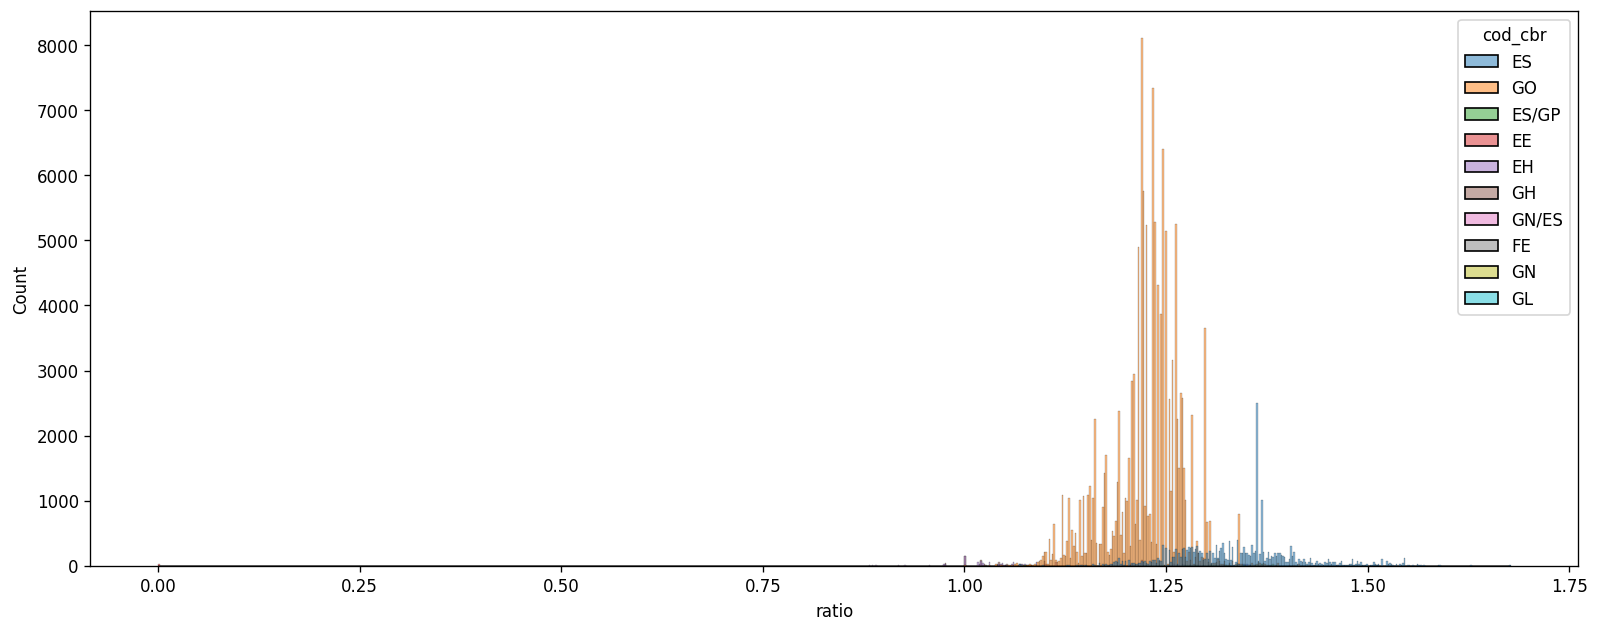

In [57]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

sns.histplot(
    data=data,
    x='ratio',
    hue='cod_cbr',
    ax=ax,
)

plt.show()

> As we have all `conso_mixte` that is a representation of both `conso_urb` and `conso_exurb`, we will keep only the first one.

In [58]:
df = df.drop(columns=['conso_urb', 'conso_exurb'], axis=1)

## `masse_ordma_min` and `masse_ordma_max`

In [59]:
df[['masse_ordma_max', 'masse_ordma_min']].isna().sum()

masse_ordma_max    0
masse_ordma_min    0
dtype: int64

In [60]:
len(df[df.masse_ordma_min == df.masse_ordma_max])

46279

In [61]:
len(df[abs((df.masse_ordma_min -  df.masse_ordma_max) / df.masse_ordma_max < 0.02)])

159080

> As these variables are very close, with most of them presenting less than 2% difference, we consider them as being the same information.
>
> We will keep only the max value.

In [62]:
df = df.drop(columns=['masse_ordma_min'], axis=1)

## Duplicate check

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159080 entries, 0 to 159779
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   lib_mrq_utac       159080 non-null  object 
 1   lib_mod_doss       159080 non-null  object 
 2   lib_mod            159080 non-null  object 
 3   dscom              159080 non-null  object 
 4   tvv                159080 non-null  object 
 5   cod_cbr            159080 non-null  object 
 6   hybride            159080 non-null  object 
 7   puiss_admin_98     159080 non-null  float64
 8   puiss_max          159080 non-null  float64
 9   typ_boite_nb_rapp  159080 non-null  object 
 10  conso_mixte        159080 non-null  float64
 11  co2                159080 non-null  float64
 12  co_typ_1           159080 non-null  float64
 13  hc                 159080 non-null  float64
 14  nox                159080 non-null  float64
 15  hcnox              159080 non-null  float64
 16  masse_o

In [64]:
columns = ['tvv', 'cod_cbr', 'hybride', 'puiss_admin_98', 'puiss_max', 'typ_boite_nb_rapp',
           'conso_mixte', 'co2', 'co_typ_1', 'hcnox', 'masse_ordma_max']
df[columns].duplicated().sum()

55832

> Droping duplicates

In [65]:
df = df.drop_duplicates(subset=columns)

In [66]:
df.isna().sum()

lib_mrq_utac         0
lib_mod_doss         0
lib_mod              0
dscom                0
tvv                  0
cod_cbr              0
hybride              0
puiss_admin_98       0
puiss_max            0
typ_boite_nb_rapp    0
conso_mixte          0
co2                  0
co_typ_1             0
hc                   0
nox                  0
hcnox                0
masse_ordma_max      0
champ_v9             0
year                 0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103248 entries, 0 to 159779
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   lib_mrq_utac       103248 non-null  object 
 1   lib_mod_doss       103248 non-null  object 
 2   lib_mod            103248 non-null  object 
 3   dscom              103248 non-null  object 
 4   tvv                103248 non-null  object 
 5   cod_cbr            103248 non-null  object 
 6   hybride            103248 non-null  object 
 7   puiss_admin_98     103248 non-null  float64
 8   puiss_max          103248 non-null  float64
 9   typ_boite_nb_rapp  103248 non-null  object 
 10  conso_mixte        103248 non-null  float64
 11  co2                103248 non-null  float64
 12  co_typ_1           103248 non-null  float64
 13  hc                 103248 non-null  float64
 14  nox                103248 non-null  float64
 15  hcnox              103248 non-null  float64
 16  masse_o

> We end up with 103 256 entries

#### Year distribution

In [68]:
df.year.value_counts()

year
2014    47733
2013    33183
2015    19605
2012     2727
Name: count, dtype: int64

# 4. FEATURE ENGINEERING

## Extract engine power and cylinder volume from `dscom`

In [69]:
df.dscom

0                            159 1750 Tbi (200ch) 
1                        159 2.0 JTDm (170ch) ECO 
2                            159 2.0 JTDm (136ch) 
3                            159 2.0 JTDm (136ch) 
4                            159 2.0 JTDm (170ch) 
                            ...                   
159764                         500 1.4 16V (100ch)
159765                            500C 1.4 (100ch)
159766                 500 1.4 16V Dualogic Euro 5
159767                          500 1.4 16V Euro 5
159779    Delta 1.9 MultiJet Twinturbo (190ch) DPF
Name: dscom, Length: 103248, dtype: object

In [70]:
df.dscom.isna().sum()

0

- **Power**

In [71]:
df.dscom.str.extract(r'\((\d+)ch\)').head(3)

0
0  200
1  170
2  136

In [72]:
df.puiss_max.head(3)

0    147.0
1    125.0
2    100.0
Name: puiss_max, dtype: float64

> Can be easily done but corresponds to the same information of `puiss_max` column

- **cylinder volume**

In [73]:
# text = 'BRAVO 1.6 MultiJet (120ch) Sport Euro 5'
text = '159 1750 Tbi (200ch)'
def extract_cylinder_volume(text):
    pattern = r'\d\.\d'
    result = re.findall(pattern, text)
    if len(result) > 0:
        return result[0]
    else:
        return np.nan

In [74]:
cyl_vol = df.dscom.apply(extract_cylinder_volume)

In [75]:
cyl_vol.isna().sum()

71824

> Most of the values are null and are not found in the EEA dataset, we are not adding this feature to our dataset.
>
> Additionally, `dscom` has manyn unique values and show no interest for the modeling. we will drop it.

In [76]:
df = df.drop('dscom', axis=1)

## typ_boite_nb_rapp

> The variable typ_boite_nb_rapp is composed of two parts:
> 
> - A letter indicating the type of gearbox
> - A number indicating the number of reports

> Separate first letter and number from `typ_boite_nb_rapp` in different features and check the correlation of each category with CO2 emissions.

In [77]:
df.typ_boite_nb_rapp

0         M 6
1         M 6
2         M 6
3         M 6
4         M 6
         ... 
159764    M 6
159765    M 6
159766    M 5
159767    M 6
159779    M 6
Name: typ_boite_nb_rapp, Length: 103248, dtype: object

In [78]:
df.typ_boite_nb_rapp.unique()

array(['M 6', 'A 6', 'D 6', 'M 5', 'A 7', 'V 0', 'A 8', 'M 7', 'A 5',
       'A 4', 'D 7', 'D 5', 'A 9', 'V .', 'A 0', 'S 6'], dtype=object)

In [79]:
type_of_gearbox = df.typ_boite_nb_rapp.apply(lambda x: x[0])
df['type_of_gearbox'] = type_of_gearbox

In [80]:
nbr_reports = df.typ_boite_nb_rapp.apply(lambda x: x[-1:])
df['nbr_reports'] = nbr_reports

In [81]:
df.type_of_gearbox.value_counts()

type_of_gearbox
M    51846
A    50210
V      966
D      224
S        2
Name: count, dtype: int64

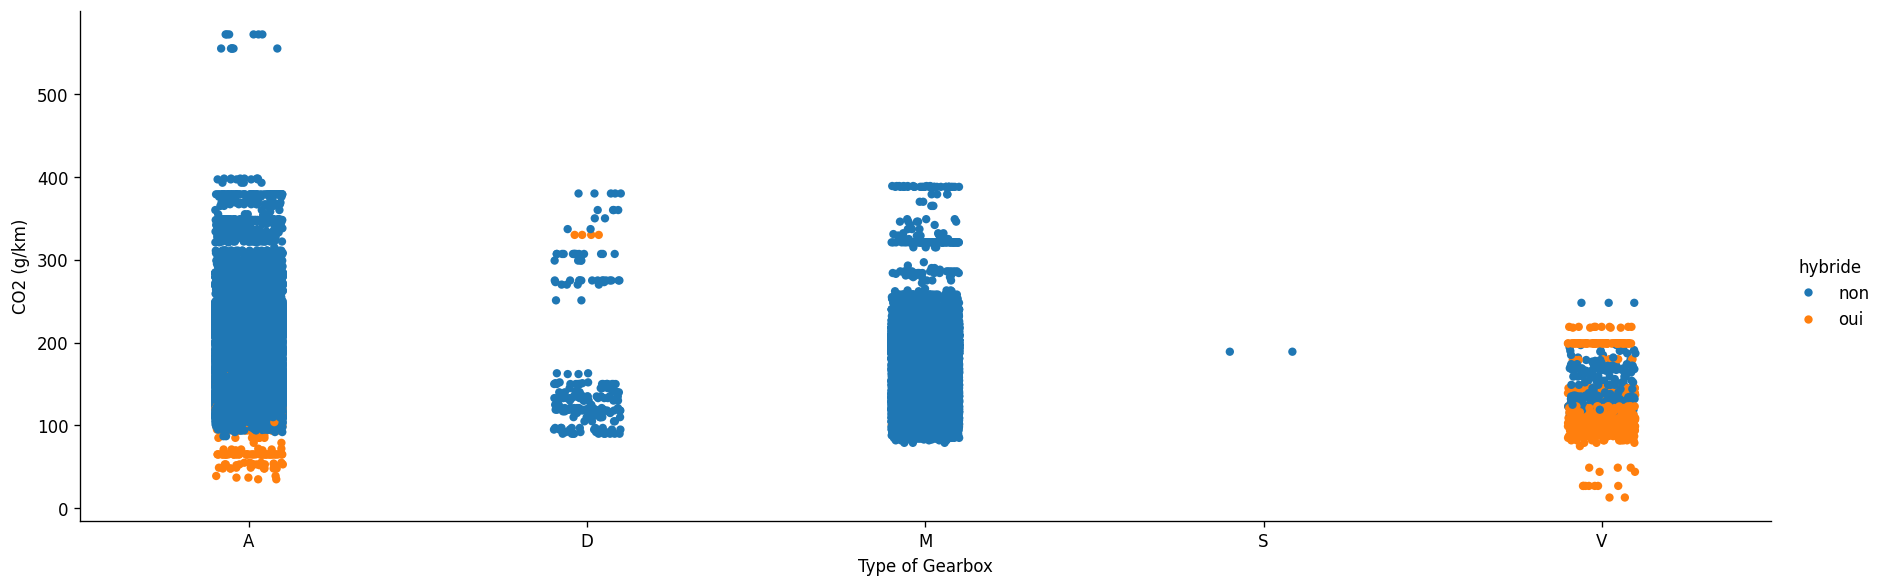

In [82]:
sns.catplot(
    data=df.sort_values(by='type_of_gearbox'),
    x='type_of_gearbox',
    y='co2',
    hue='hybride',
    height=5,
    aspect=3,
)
plt.xlabel('Type of Gearbox')
plt.ylabel('CO2 (g/km)')
plt.savefig(os.path.join('imgs', 'Type of Gearbox.png'), dpi=120)
plt.show()

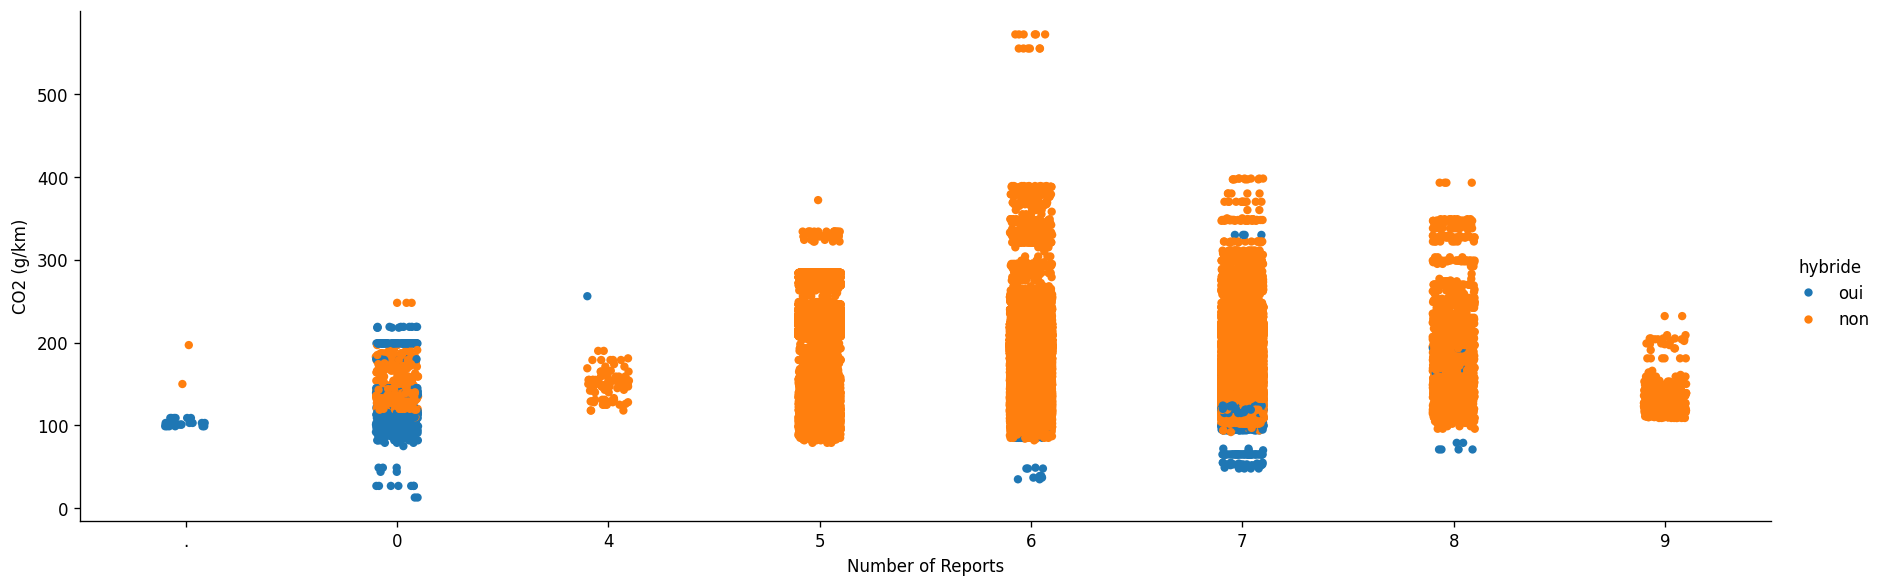

In [83]:
sns.catplot(
    data=df.sort_values(by='nbr_reports'),
    x='nbr_reports',
    y='co2',
    hue='hybride',
    height=5,
    aspect=3,
)
plt.xlabel('Number of Reports')
plt.ylabel('CO2 (g/km)')
plt.savefig(os.path.join('imgs', 'Number of Reports.png'), dpi=120)
plt.show()

> There is a clear correlation between these features and the target variable.
>
> We will add both and drop the source column

In [84]:
df = df.drop('typ_boite_nb_rapp', axis=1)

## Add variables from EEA 

> The ‘tvv’, as a unique identification number can be used to complete the French government data with new variables
from EEA dataset.

In [85]:
EEA_values = UE[['tvv', 'w (mm)', 'at1 (mm)', 'm (kg)', 'ec (cm3)']].fillna(method='bfill').drop_duplicates(subset=['tvv'])

In [86]:
EEA_values.head(2)

tvv  w (mm)  at1 (mm)  m (kg)  ec (cm3)
id                                            
1   CH6391  2400.0    1325.0  1515.0    1340.0
2     RIOT  2310.0    1320.0   575.0    1340.0

In [87]:
EEA_values.shape

(45361, 5)

In [88]:
df.shape

(103248, 19)

In [89]:
df = df.join(EEA_values.set_index('tvv'), on="tvv")

In [90]:
df[df['w (mm)'].isna()]

lib_mrq_utac lib_mod_doss lib_mod                tvv cod_cbr hybride  \
12       ALFA ROMEO           4C      4C         960CXB1A01      ES     non   
14       ALFA ROMEO  AR8C SPIDER      8C        920BXA1A00B      ES     non   
16       ALFA ROMEO        BRERA   BRERA        939DXN1B56B      ES     non   
19       ALFA ROMEO        BRERA   BRERA         939DXQ1B60      GO     non   
20       ALFA ROMEO        BRERA   BRERA        939DXQ1B60B      GO     non   
...             ...          ...     ...                ...     ...     ...   
159645     MERCEDES     CLASSE M  ML 350  166AXS6M1NZAAB520      ES     non   
159646     MERCEDES     CLASSE M  ML 350  166AXS6M1NZAAB521      ES     non   
159652     MERCEDES     CLASSE M  ML 350  166AXS6M1NZAAB531      ES     non   
159672     MERCEDES     CLASSE M  ML 350  166AXBSP1NZAAA502      GO     non   
159693     MERCEDES     CLASSE M  ML 350  166AXBSP1NZAAB500      GO     non   

        puiss_admin_98  puiss_max  conso_mixte    co2  ...  hcnox  \
12                14.0      177.0          6.8  157.0  ...  0.082   
14                38.0      331.0         16.3  379.0  ...  0.065   
16                12.0      147.0          8.1  189.0  ...  0.100   
19                 9.0      120.0          5.4  142.0  ...  0.180   
20                 9.0      120.0          5.4  142.0  ...  0.180   
...                ...        ...          ...    ...  ...    ...   
159645            20.0      225.0          8.5  199.0  ...  0.057   
159646            20.0      225.0          8.8  206.0  ...  0.057   
159652            20.0      225.0          8.8  206.0  ...  0.057   
159672            16.0      190.0          7.4  194.0  ...  0.095   
159693            16.0      190.0          6.8  179.0  ...  0.095   

        masse_ordma_max                 champ_v9  year  type_of_gearbox  \
12                995.0  715/2007*195/2013EURO6   2015                A   
14               1750.0  715/2007*692/2008EURO5   2015                M   
16               1505.0  715/2007*692/2008EURO5   2015                M   
19               1555.0  715/2007*692/2008EURO5   2015                M   
20               1555.0  715/2007*692/2008EURO5   2015                M   
...                 ...                      ...   ...              ...   
159645           2130.0   715/2007*692/2008EURO5  2012                A   
159646           2130.0   715/2007*692/2008EURO5  2012                A   
159652           2130.0   715/2007*692/2008EURO5  2012                A   
159672           2175.0   715/2007*692/2008EURO6  2012                A   
159693           2175.0   715/2007*692/2008EURO6  2012                A   

       nbr_reports  w (mm) at1 (mm) m (kg)  ec (cm3)  
12               6     NaN      NaN    NaN       NaN  
14               6     NaN      NaN    NaN       NaN  
16               6     NaN      NaN    NaN       NaN  
19               6     NaN      NaN    NaN       NaN  
20               6     NaN      NaN    NaN       NaN  
...            ...     ...      ...    ...       ...  
159645           7     NaN      NaN    NaN       NaN  
159646           7     NaN      NaN    NaN       NaN  
159652           7     NaN      NaN    NaN       NaN  
159672           7     NaN      NaN    NaN       NaN  
159693           7     NaN      NaN    NaN       NaN  

[88515 rows x 23 columns]

In [91]:
UE[UE['T']=='920BXA1A00']

Empty DataFrame
Columns: [MS, Mh, MAN, MMS, TAN, T, Va, Ve, Mk, Cn, Ct, r, e (g/km), m (kg), w (mm), at1 (mm), at2 (mm), Ft, Fm, ec (cm3), ep (KW), z (Wh/km), IT, Er (g/km), MP, tvv]
Index: []

[0 rows x 26 columns]

In [92]:
df.isna().sum()

lib_mrq_utac           0
lib_mod_doss           0
lib_mod                0
tvv                    0
cod_cbr                0
hybride                0
puiss_admin_98         0
puiss_max              0
conso_mixte            0
co2                    0
co_typ_1               0
hc                     0
nox                    0
hcnox                  0
masse_ordma_max        0
champ_v9               0
year                   0
type_of_gearbox        0
nbr_reports            0
w (mm)             88515
at1 (mm)           88515
m (kg)             88515
ec (cm3)           88515
dtype: int64

> Most of the values are missing, we will not keep this variables

In [93]:
df.drop(columns=['tvv', 'w (mm)', 'at1 (mm)', 'm (kg)', 'ec (cm3)'], inplace=True)
df.isna().sum()

lib_mrq_utac       0
lib_mod_doss       0
lib_mod            0
cod_cbr            0
hybride            0
puiss_admin_98     0
puiss_max          0
conso_mixte        0
co2                0
co_typ_1           0
hc                 0
nox                0
hcnox              0
masse_ordma_max    0
champ_v9           0
year               0
type_of_gearbox    0
nbr_reports        0
dtype: int64

## champ_v9

> Investigate if certified or no certified car has an impact on the CO2 emissions. A binary variable can be created.

In [94]:
df.champ_v9.isna().sum()

0

> After removing the duplicated cars, we end up with 0 non certified cars. This feature cannot therefore be created.
> The column has also no use identified, we will drop it.

In [95]:
df = df.drop('champ_v9', axis=1)

# 5. REMAINING VARIABLES TO DROP

> The following variables do not bring any interesting information to the modelling and / or their content do not allow to
> differentiate the co2 emissions (refer to analysis in the corresponding sections):
>  
> - `mrq_utac`: high quantity of missing values, as not present in all years.
> - `puiss_heure`: high quantity of missing values, as not present in all years.
> - `Unnamed`: 26: empty.
> - `Unnamed`: 27: empty.
> - `Unnamed`: 28: empty.
> - `Unnamed`: 29: empty.
> - `cnit`: We do not find, in this first analysis an interest on these values, it will therefore be dropped.
> - `puiss_admin_98`: can be used to back calculate co2 emissions, no sense to make a ML model if we have this value.
>

In [96]:
df = df.drop('puiss_admin_98', axis=1)

In [97]:
df[['lib_mrq_utac', 'lib_mod_doss', 'lib_mod']].nunique()

lib_mrq_utac     47
lib_mod_doss    572
lib_mod         506
dtype: int64

> Additionally, `lib_mod_doss` and `lib_mod` have many values and cannot be easily associated with the co2 emissions, we will drop these columns. 

In [98]:
df = df.drop(['lib_mod_doss', 'lib_mod'], axis=1)

# 6. FINAL DATA SET

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103248 entries, 0 to 159779
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lib_mrq_utac     103248 non-null  object 
 1   cod_cbr          103248 non-null  object 
 2   hybride          103248 non-null  object 
 3   puiss_max        103248 non-null  float64
 4   conso_mixte      103248 non-null  float64
 5   co2              103248 non-null  float64
 6   co_typ_1         103248 non-null  float64
 7   hc               103248 non-null  float64
 8   nox              103248 non-null  float64
 9   hcnox            103248 non-null  float64
 10  masse_ordma_max  103248 non-null  float64
 11  year             103248 non-null  int64  
 12  type_of_gearbox  103248 non-null  object 
 13  nbr_reports      103248 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 11.8+ MB


In [100]:
data_phase_2_path = os.path.join(data_dir,'2-cleaned', 'data_phase_2.csv')
df.to_csv(data_phase_2_path, index=False)

# 7. DATAVIZ (EXTRA)

## Quantitative Variables

In [101]:
num_vars_list = [
    'co2',
    'puiss_max',
    'conso_mixte',
    'co_typ_1',
    'hc',
    'nox',
    'hcnox',
    'masse_ordma_max'
]
num_vars = df[num_vars_list]

> Now that the variables are converted to numerical values

In [102]:
df[num_vars_list].info()

<class 'pandas.core.frame.DataFrame'>
Index: 103248 entries, 0 to 159779
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   co2              103248 non-null  float64
 1   puiss_max        103248 non-null  float64
 2   conso_mixte      103248 non-null  float64
 3   co_typ_1         103248 non-null  float64
 4   hc               103248 non-null  float64
 5   nox              103248 non-null  float64
 6   hcnox            103248 non-null  float64
 7   masse_ordma_max  103248 non-null  float64
dtypes: float64(8)
memory usage: 7.1 MB


In [103]:
df[num_vars_list].describe().round(2)

co2  puiss_max  conso_mixte   co_typ_1         hc        nox  \
count  103248.00  103248.00    103248.00  103248.00  103248.00  103248.00   
mean      191.56     124.99         7.43       0.20       0.03       0.28   
std        42.37      54.59         1.69       0.14       0.01       0.44   
min        13.00      28.00         0.60       0.00       0.00       0.00   
25%       163.00     100.00         6.60       0.08       0.01       0.12   
50%       202.00     120.00         7.70       0.16       0.02       0.21   
75%       216.00     125.00         8.20       0.30       0.03       0.23   
max       572.00     585.00        24.50       0.97       0.51       1.85   

           hcnox  masse_ordma_max  
count  103248.00        103248.00  
mean        0.31          2196.42  
std         0.43           473.50  
min         0.01           825.00  
25%         0.15          1845.00  
50%         0.22          2185.00  
75%         0.26          2585.00  
max         1.86          3094.00

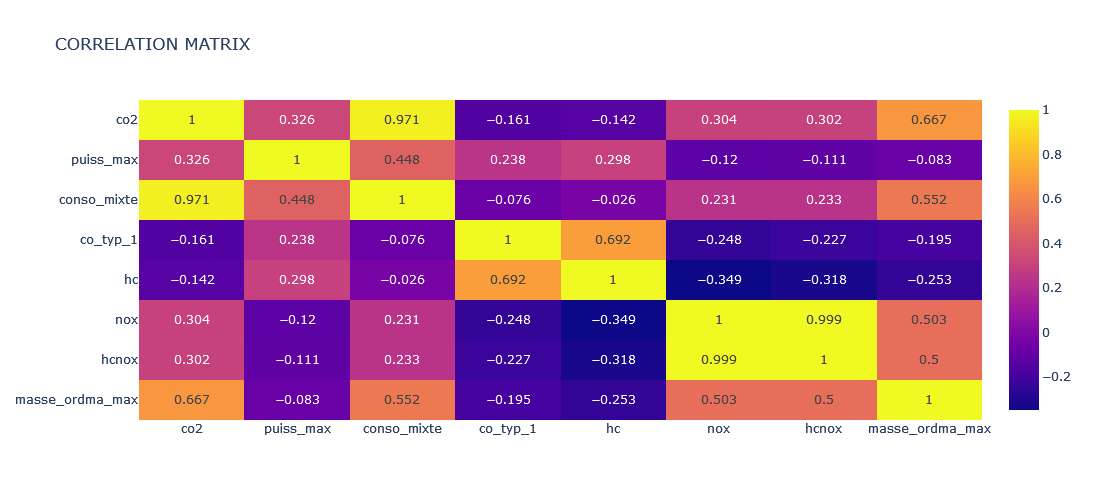

In [104]:
fig = px.imshow(
    num_vars.corr().round(3), 
    width=1400,
    height=500,
    text_auto=True,
    aspect='auto',
    title='CORRELATION MATRIX'
)
fig.show()

fig.write_image(os.path.join('imgs', '0-CORRELATION MATRIX.svg'), width=1400, height=500)

In [105]:
num_vars_list

['co2',
 'puiss_max',
 'conso_mixte',
 'co_typ_1',
 'hc',
 'nox',
 'hcnox',
 'masse_ordma_max']

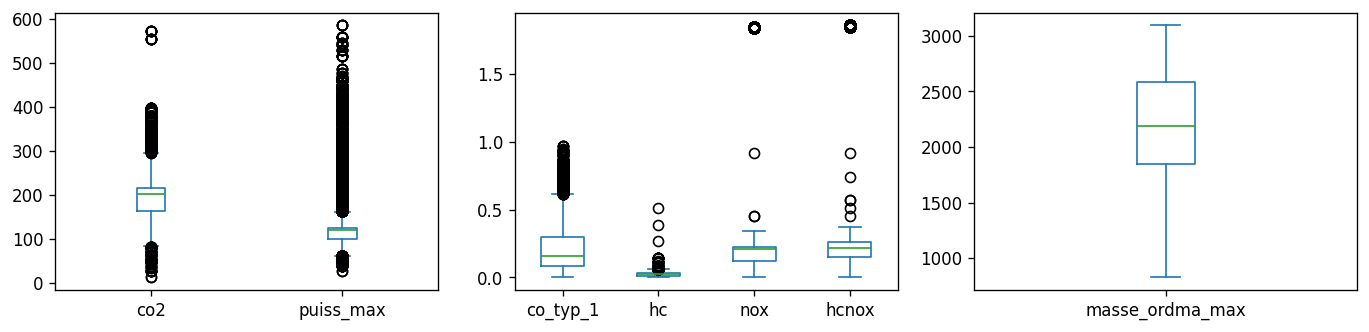

In [106]:
fig = plt.figure(figsize=(14,3))

ax1 = fig.add_subplot(131)
df[['co2', 'puiss_max']].plot(kind='box', ax=ax1)

ax2 = fig.add_subplot(132)
df[[
    'co_typ_1',
     'hc',
     'nox',
     'hcnox']].plot(kind='box', ax=ax2)

ax3 = fig.add_subplot(133)
df[['masse_ordma_max']].plot(kind='box', ax=ax3)
fig.savefig(os.path.join('imgs', 'BOX PLOTS.png'), dpi=120)

plt.show()

## Categorical Variables

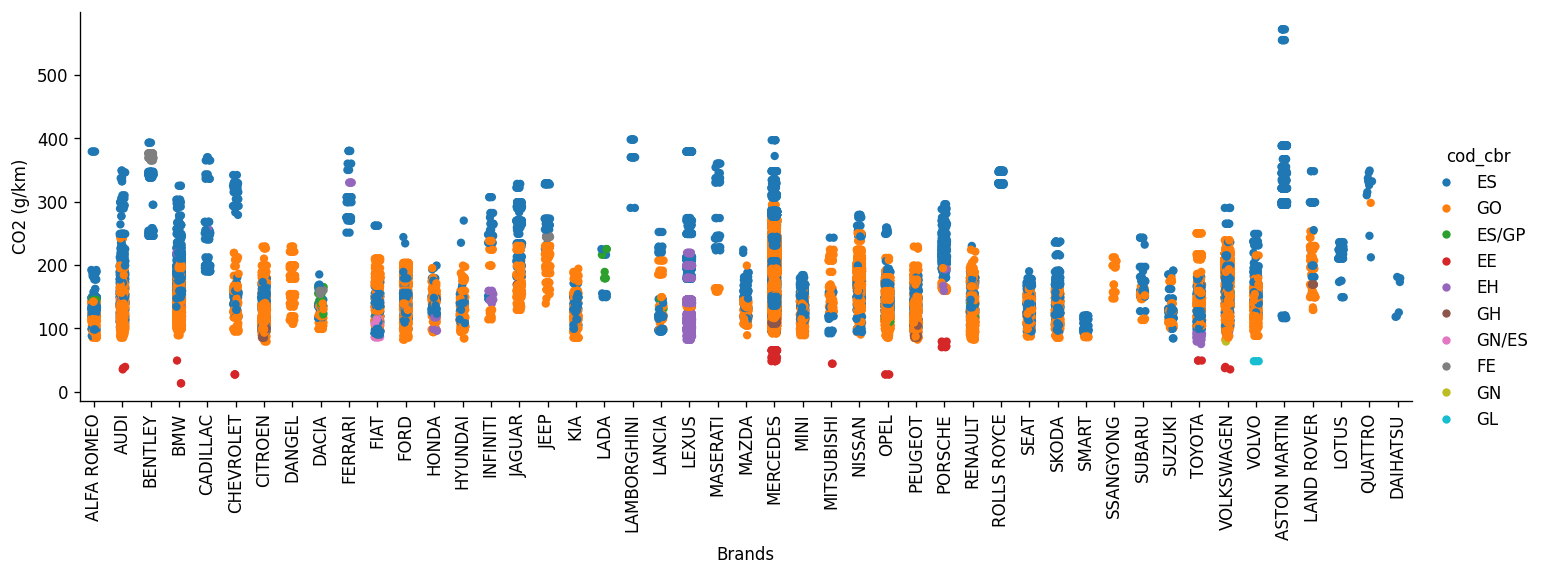

In [107]:
sns.catplot(
    data=df,
    x='lib_mrq_utac', 
    y ='co2',
    height=4,
    aspect=3,
    hue='cod_cbr'
)
plt.xlabel('Brands')
plt.ylabel('CO2 (g/km)')
plt.tick_params(axis='x', rotation=90)
plt.savefig(os.path.join('imgs', 'co2_vs_brand_and_fuel.png'), dpi=120)
plt.show()

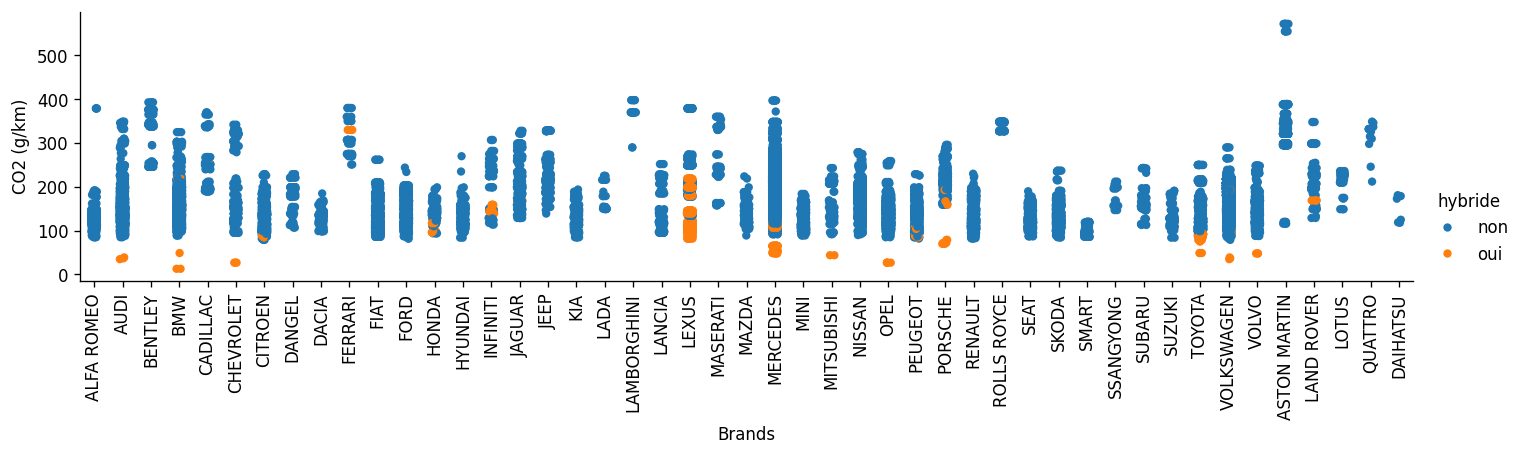

In [108]:
sns.catplot(
    data=df,
    x='lib_mrq_utac', 
    y ='co2',
    height=3,
    aspect=4,
    hue='hybride'
)
plt.xlabel('Brands')
plt.ylabel('CO2 (g/km)')
plt.tick_params(axis='x', rotation=90)
plt.savefig(os.path.join('imgs', 'lib_mrq_utac.png'), dpi=120)
plt.show()

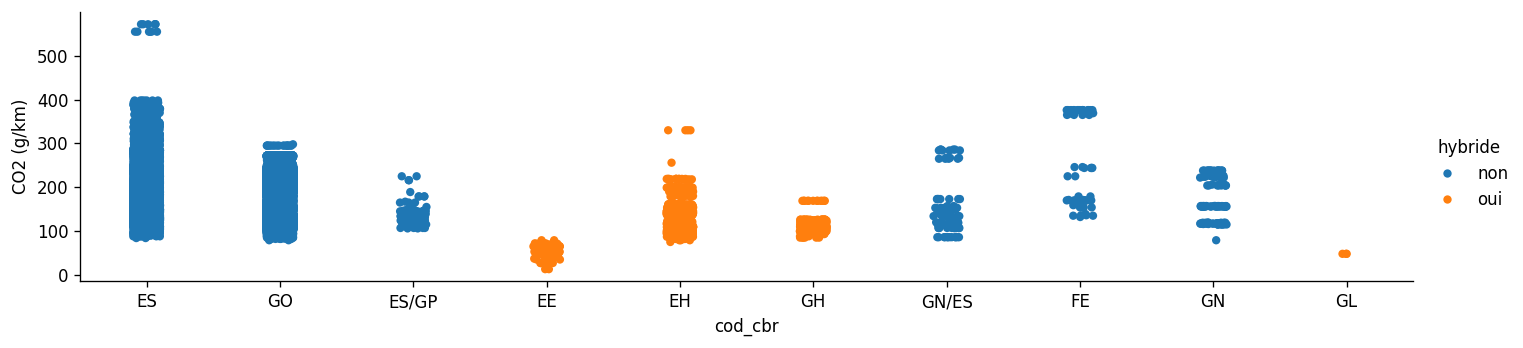

In [109]:
sns.catplot(
    data=df,
    x='cod_cbr', 
    y ='co2',
    height=3,
    aspect=4,
    hue='hybride'
)
plt.ylabel('CO2 (g/km)')
plt.savefig(os.path.join('imgs', 'cod_cbr.png'), dpi=120)
plt.show()

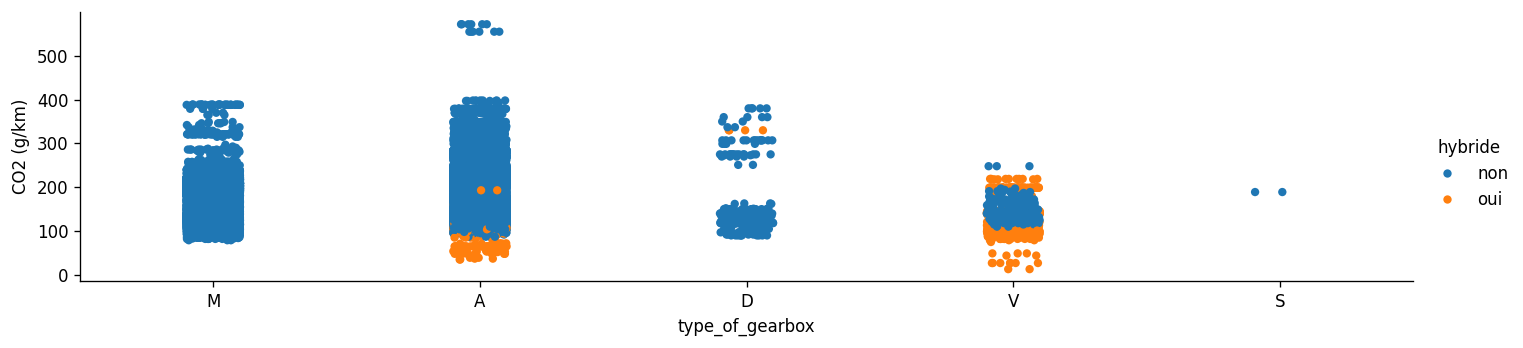

In [110]:
sns.catplot(
    data=df,
    x='type_of_gearbox', 
    y ='co2',
    height=3,
    aspect=4,
    hue='hybride'
)
plt.ylabel('CO2 (g/km)')
plt.savefig(os.path.join('imgs', 'type_of_gearbox.png'), dpi=120)
plt.show()

In [ ]:
sns.catplot(
    data=df.sort_values(by='type_of_gearbox'),
    x='nbr_reports',
    y='co2',
    hue='hybride',
    height=3,
    aspect=4
)
plt.xlabel('Number of Reports')
plt.ylabel('CO2 (g/km)')
plt.savefig(os.path.join('imgs', 'Number of Reports.png'), dpi=120)
plt.show()